##  <center>  Entendimiento de imágenes de personas <br>Andrea Reales && Jesus Ortiz </center>
<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="10%" height="10%" />

<a id="tercero"></a>
## 3. Entendimiento de imágenes de personas

El problema de inferir ciertas características de una persona a través de una foto de ella puede resultar bastante dificil incluso para nosotros, como por ejemplo de qué país es, la emoción que expresa, la edad que tiene, o el género. La automatización de este proceso para que máquinas logren identificar ciertas características de una persona puede ser algo crucial para el futuro desarrollo de Inteligencia Artificial.


<img src="https://i.imgur.com/6B072GE.jpg" width="60%" height="20%" />

En esta actividad trabajaremos con unos datos (imágenes) con la tarea de predecir la **edad** (*target value*) de la persona en la imagen. Los datos con corresponden a 3640 imágenes de Flickr de rostros de personas, pero, debido a que trabajamos con redes *feed forward*, se trabajará con representaciones de características extraídas. Para ésto necesitará descargar los datos del siguiente __[link](http://chenlab.ece.cornell.edu/people/Andy/ImagesOfGroups.html)__ en el extracto de *ageGenderClassification* o a través de la consola Unix.

wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/ageGenderClassification.zip

Se trabajará con archivos *.mat* que pueden ser cargados de la siguiente manera:

Para descripción sobre las columnas están en el archivo readme a través del siguiente __[link](http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt)__ o a través de la consola Unix:

wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/README.txt

a) Cargue los datos dos dataset de entrenamiento y de pruebas ¿Cuántos datos hay en cada conjunto?

In [59]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import scipy.io as sio
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [6]:
mat_train = sio.loadmat("C:/Users/Jesus/Documents/GitHub/AgeGenderClassification/eventrain.mat")
mat_test = sio.loadmat("C:/Users/Jesus/Documents/GitHub/AgeGenderClassification/eventest.mat")
data_train= mat_train["trcoll"][0][0]
data_test= mat_test["tecoll"][0][0]


In [45]:
x=len(data_train)
y=len(data_train[10])
z=x*y

In [46]:
print("Numero de caracteristicas de entrada=",x,"Total de muestras=",y,"Total datos entrenamiento=",z)

Numero de caracteristicas de entrada= 11 Total de muestras= 3500 Total datos entrenamiento= 38500


In [41]:
data_train[1]

array([[51],
       [28],
       [28],
       ...,
       [ 1],
       [ 1],
       [ 1]], dtype=uint8)

In [38]:
x1=len(data_test)
y1=len(data_test[0])
z1=x1*y1

In [39]:
print("Numero de caracteristicas de entrada=",x1,"Total de muestras=",y1,"Total datos test=",z1)

Numero de caracteristicas de entrada= 11 Total de muestras= 1050 Total datos test= 11550


b) Eliga cuál representación utilizará para trabajar los datos y entregárselos como *input* al modelo neuronal denso. Además extraiga las etiquetas del problema. Describa los datos utilziados.

In [92]:
ageClass_train = data_train[1] #target
ffcoefs_train = data_train[4]   #it can be used as representation: fisherface space
X_train=ffcoefs_train[:int(0.8*y)]                       
X_val=ffcoefs_train[int(0.8*y)::]
y_train=ageClass_train[:int(0.8*y)]                       
y_val=ageClass_train[int(0.8*y)::]    
y_test = data_test[1] #target
X_test = data_test[4]   #it can be used as representation: fisherface space

In [93]:
X_test

array([[  16.453856 ,   34.83934  ,   48.7035   , ..., -198.66533  ,
         109.027985 ,   78.18502  ],
       [  53.82186  ,   93.61051  ,   65.62783  , ...,  657.3836   ,
         820.10693  , -132.57458  ],
       [   6.8143125,  -20.586594 ,  -50.35877  , ..., -409.62454  ,
        -196.4159   ,  111.17357  ],
       ...,
       [ -34.0235   ,  -75.17138  ,  -87.20992  , ..., -212.65627  ,
        -301.569    , -366.88312  ],
       [  17.623787 ,    2.0862489,  -15.78859  , ...,   20.659277 ,
         155.44498  ,  404.44925  ],
       [ -29.624369 ,  -83.67899  ,  -97.403336 , ...,  416.36523  ,
         415.95398  ,  -69.081314 ]], dtype=float32)

c) Defina y entrene una modelo de red neuronal *feed forward* para la inferencia de la edad de la persona a través de la representación escogida. Intente llegar a un *mse* menor a 100 en el conjunto de pruebas. Recuerde que **NO** puede seleccionar modelos a través del conjunto de pruebas. Visualice sus resultados si estima conveniente.

*Nota: Puede notar que la cantidad de edades presentes en el problema son pocas (1,  5, 10, 16, 28, 51 o 75 años), por lo que puede tratar al problema así como de regresión o clasificación (considerando cada edad como una clase)*


#### Ayuda:
> Para problemas de clasificación de múltiples clases es necesario transformar las etiquetas categóricas en *one hot vector*, donde cada columna del vector representará una categoría. Por ejemplo, si existen tres categorías (perro, gato, ratón), la categoría perro puede ser codificada como [1,0,0], y la categoría ratón puede ser codificada como [0,0,1]. Para ésto la librería *keras* nos ayuda:

In [82]:
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(100,kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=2000, verbose=1, validation_data=(X_val, y_val))

Train on 2800 samples, validate on 700 samples
Epoch 1/2000
2800/2800 [==============================] - 2s 751us/step - loss: 1001.7054 - val_loss: 1180.5723
Epoch 2/2000
2800/2800 [==============================] - 0s 170us/step - loss: 645.1332 - val_loss: 475.5410
Epoch 3/2000
2800/2800 [==============================] - 0s 177us/step - loss: 642.9073 - val_loss: 936.8676
Epoch 4/2000
2800/2800 [==============================] - 1s 188us/step - loss: 571.6715 - val_loss: 1075.7999
Epoch 5/2000
2800/2800 [==============================] - 1s 181us/step - loss: 557.4706 - val_loss: 689.8051
Epoch 6/2000
2800/2800 [==============================] - 1s 180us/step - loss: 560.7828 - val_loss: 513.2231
Epoch 7/2000
2800/2800 [==============================] - 1s 181us/step - loss: 553.9975 - val_loss: 469.6561
Epoch 8/2000
2800/2800 [==============================] - 0s 177us/step - loss: 555.8697 - val_loss: 527.3129
Epoch 9/2000
2800/2800 [==============================] - 1s 192us/ste

2800/2800 [==============================] - 1s 253us/step - loss: 442.7425 - val_loss: 1092.3120
Epoch 75/2000
2800/2800 [==============================] - 1s 244us/step - loss: 466.3797 - val_loss: 580.7908
Epoch 76/2000
2800/2800 [==============================] - 1s 238us/step - loss: 438.1353 - val_loss: 873.8054
Epoch 77/2000
2800/2800 [==============================] - 1s 249us/step - loss: 435.4059 - val_loss: 1516.5683
Epoch 78/2000
2800/2800 [==============================] - 1s 260us/step - loss: 427.2141 - val_loss: 784.1926
Epoch 79/2000
2800/2800 [==============================] - 1s 285us/step - loss: 443.2477 - val_loss: 570.4542
Epoch 80/2000
2800/2800 [==============================] - 1s 265us/step - loss: 426.9937 - val_loss: 854.2529
Epoch 81/2000
2800/2800 [==============================] - 1s 256us/step - loss: 430.3472 - val_loss: 509.8691
Epoch 82/2000
2800/2800 [==============================] - 1s 284us/step - loss: 427.8635 - val_loss: 1085.0468
Epoch 83/200

2800/2800 [==============================] - 1s 202us/step - loss: 388.0835 - val_loss: 710.2996
Epoch 148/2000
2800/2800 [==============================] - 1s 193us/step - loss: 374.3301 - val_loss: 547.8257
Epoch 149/2000
2800/2800 [==============================] - 1s 186us/step - loss: 381.6228 - val_loss: 891.2869
Epoch 150/2000
2800/2800 [==============================] - 0s 164us/step - loss: 358.6916 - val_loss: 565.7141
Epoch 151/2000
2800/2800 [==============================] - 1s 184us/step - loss: 376.5170 - val_loss: 602.4368
Epoch 152/2000
2800/2800 [==============================] - 1s 179us/step - loss: 417.2980 - val_loss: 643.4717
Epoch 153/2000
2800/2800 [==============================] - 1s 179us/step - loss: 374.0066 - val_loss: 862.8211
Epoch 154/2000
2800/2800 [==============================] - 1s 189us/step - loss: 405.2671 - val_loss: 1167.4955
Epoch 155/2000
2800/2800 [==============================] - 0s 170us/step - loss: 352.6903 - val_loss: 712.5489
Epoch 

2800/2800 [==============================] - 0s 125us/step - loss: 260.5922 - val_loss: 632.1714
Epoch 221/2000
2800/2800 [==============================] - 0s 116us/step - loss: 281.0736 - val_loss: 591.0877
Epoch 222/2000
2800/2800 [==============================] - 0s 129us/step - loss: 261.4673 - val_loss: 774.4489
Epoch 223/2000
2800/2800 [==============================] - 0s 130us/step - loss: 255.5068 - val_loss: 596.6387
Epoch 224/2000
2800/2800 [==============================] - 0s 100us/step - loss: 274.7689 - val_loss: 920.7983
Epoch 225/2000
2800/2800 [==============================] - 0s 120us/step - loss: 268.9324 - val_loss: 638.1079
Epoch 226/2000
2800/2800 [==============================] - 0s 121us/step - loss: 292.7158 - val_loss: 825.9418
Epoch 227/2000
2800/2800 [==============================] - 0s 103us/step - loss: 253.7381 - val_loss: 738.6997
Epoch 228/2000
2800/2800 [==============================] - 0s 100us/step - loss: 270.2047 - val_loss: 728.8403
Epoch 2

Epoch 293/2000
2800/2800 [==============================] - 0s 132us/step - loss: 250.9509 - val_loss: 813.7534
Epoch 294/2000
2800/2800 [==============================] - 0s 123us/step - loss: 224.2475 - val_loss: 1317.5131
Epoch 295/2000
2800/2800 [==============================] - 0s 123us/step - loss: 227.0957 - val_loss: 806.2564
Epoch 296/2000
2800/2800 [==============================] - 0s 129us/step - loss: 205.8547 - val_loss: 720.4897
Epoch 297/2000
2800/2800 [==============================] - 0s 141us/step - loss: 225.7647 - val_loss: 1338.2454
Epoch 298/2000
2800/2800 [==============================] - 0s 132us/step - loss: 239.9874 - val_loss: 806.3093
Epoch 299/2000
2800/2800 [==============================] - 0s 137us/step - loss: 236.2305 - val_loss: 824.2640
Epoch 300/2000
2800/2800 [==============================] - 0s 124us/step - loss: 210.7001 - val_loss: 891.0465
Epoch 301/2000
2800/2800 [==============================] - 0s 142us/step - loss: 204.7330 - val_loss:

Epoch 366/2000
2800/2800 [==============================] - 0s 131us/step - loss: 183.8034 - val_loss: 802.3206
Epoch 367/2000
2800/2800 [==============================] - 0s 125us/step - loss: 159.0226 - val_loss: 777.1452
Epoch 368/2000
2800/2800 [==============================] - 0s 127us/step - loss: 182.1764 - val_loss: 1015.0614
Epoch 369/2000
2800/2800 [==============================] - 0s 132us/step - loss: 157.3004 - val_loss: 1115.3614
Epoch 370/2000
2800/2800 [==============================] - 0s 127us/step - loss: 179.1933 - val_loss: 845.3693
Epoch 371/2000
2800/2800 [==============================] - 0s 152us/step - loss: 185.8063 - val_loss: 723.4810
Epoch 372/2000
2800/2800 [==============================] - 0s 145us/step - loss: 181.7706 - val_loss: 717.8966
Epoch 373/2000
2800/2800 [==============================] - 0s 141us/step - loss: 168.4098 - val_loss: 800.3301
Epoch 374/2000
2800/2800 [==============================] - 0s 131us/step - loss: 171.2458 - val_loss:

Epoch 439/2000
2800/2800 [==============================] - 0s 124us/step - loss: 141.2006 - val_loss: 787.0850
Epoch 440/2000
2800/2800 [==============================] - 0s 145us/step - loss: 156.6351 - val_loss: 1084.9349
Epoch 441/2000
2800/2800 [==============================] - 0s 153us/step - loss: 135.7775 - val_loss: 1190.6091
Epoch 442/2000
2800/2800 [==============================] - 0s 150us/step - loss: 218.4245 - val_loss: 838.3960
Epoch 443/2000
2800/2800 [==============================] - 0s 143us/step - loss: 150.6298 - val_loss: 798.1629
Epoch 444/2000
2800/2800 [==============================] - 0s 151us/step - loss: 131.3427 - val_loss: 798.1567
Epoch 445/2000
2800/2800 [==============================] - 0s 172us/step - loss: 148.7644 - val_loss: 827.1206
Epoch 446/2000
2800/2800 [==============================] - 0s 152us/step - loss: 130.9059 - val_loss: 873.3232
Epoch 447/2000
2800/2800 [==============================] - 0s 153us/step - loss: 139.2977 - val_loss:

2800/2800 [==============================] - 0s 143us/step - loss: 115.1490 - val_loss: 934.8089
Epoch 512/2000
2800/2800 [==============================] - 0s 155us/step - loss: 104.8469 - val_loss: 1067.1534
Epoch 513/2000
2800/2800 [==============================] - 0s 141us/step - loss: 123.7468 - val_loss: 1909.0395
Epoch 514/2000
2800/2800 [==============================] - 0s 143us/step - loss: 131.2617 - val_loss: 891.0289
Epoch 515/2000
2800/2800 [==============================] - 0s 140us/step - loss: 133.6806 - val_loss: 1096.5613
Epoch 516/2000
2800/2800 [==============================] - 0s 139us/step - loss: 160.4607 - val_loss: 1165.4943
Epoch 517/2000
2800/2800 [==============================] - 0s 132us/step - loss: 109.0275 - val_loss: 890.8356
Epoch 518/2000
2800/2800 [==============================] - 0s 126us/step - loss: 103.3202 - val_loss: 1060.5063
Epoch 519/2000
2800/2800 [==============================] - 0s 146us/step - loss: 121.6769 - val_loss: 976.4086
Ep

2800/2800 [==============================] - 0s 85us/step - loss: 127.0414 - val_loss: 796.1273
Epoch 585/2000
2800/2800 [==============================] - 0s 94us/step - loss: 149.1007 - val_loss: 950.7857
Epoch 586/2000
2800/2800 [==============================] - 0s 111us/step - loss: 120.8862 - val_loss: 836.6694
Epoch 587/2000
2800/2800 [==============================] - 0s 98us/step - loss: 145.9161 - val_loss: 904.8484
Epoch 588/2000
2800/2800 [==============================] - 0s 94us/step - loss: 126.3217 - val_loss: 934.6315
Epoch 589/2000
2800/2800 [==============================] - 0s 109us/step - loss: 126.5472 - val_loss: 1121.0009
Epoch 590/2000
2800/2800 [==============================] - 0s 114us/step - loss: 120.8123 - val_loss: 890.2631
Epoch 591/2000
2800/2800 [==============================] - 0s 94us/step - loss: 121.3408 - val_loss: 915.0547
Epoch 592/2000
2800/2800 [==============================] - 0s 84us/step - loss: 165.0246 - val_loss: 966.2567
Epoch 593/20

2800/2800 [==============================] - 0s 160us/step - loss: 108.0508 - val_loss: 1047.0945
Epoch 658/2000
2800/2800 [==============================] - 0s 151us/step - loss: 116.7131 - val_loss: 1317.1392
Epoch 659/2000
2800/2800 [==============================] - 0s 137us/step - loss: 112.2631 - val_loss: 889.6796
Epoch 660/2000
2800/2800 [==============================] - 0s 131us/step - loss: 103.6711 - val_loss: 863.9374
Epoch 661/2000
2800/2800 [==============================] - 0s 128us/step - loss: 97.7751 - val_loss: 925.9502
Epoch 662/2000
2800/2800 [==============================] - 0s 122us/step - loss: 120.9068 - val_loss: 904.2452
Epoch 663/2000
2800/2800 [==============================] - 0s 127us/step - loss: 107.5829 - val_loss: 1029.4620
Epoch 664/2000
2800/2800 [==============================] - 0s 145us/step - loss: 94.0648 - val_loss: 928.9082
Epoch 665/2000
2800/2800 [==============================] - ETA: 0s - loss: 104.405 - 0s 129us/step - loss: 106.3322 -

2800/2800 [==============================] - 0s 153us/step - loss: 90.0853 - val_loss: 878.4760
Epoch 731/2000
2800/2800 [==============================] - 0s 146us/step - loss: 93.9140 - val_loss: 1088.8861
Epoch 732/2000
2800/2800 [==============================] - 0s 138us/step - loss: 90.1958 - val_loss: 1061.7371
Epoch 733/2000
2800/2800 [==============================] - 0s 133us/step - loss: 95.3769 - val_loss: 877.1409
Epoch 734/2000
2800/2800 [==============================] - 0s 142us/step - loss: 90.4323 - val_loss: 1004.6241
Epoch 735/2000
2800/2800 [==============================] - 0s 142us/step - loss: 89.8094 - val_loss: 932.7707
Epoch 736/2000
2800/2800 [==============================] - 0s 152us/step - loss: 84.3513 - val_loss: 1022.5530
Epoch 737/2000
2800/2800 [==============================] - 0s 151us/step - loss: 84.2518 - val_loss: 1262.5955
Epoch 738/2000
2800/2800 [==============================] - 0s 136us/step - loss: 97.2636 - val_loss: 878.6087
Epoch 739/2

2800/2800 [==============================] - 0s 141us/step - loss: 75.8277 - val_loss: 911.7749
Epoch 804/2000
2800/2800 [==============================] - 0s 139us/step - loss: 85.5996 - val_loss: 1008.4778
Epoch 805/2000
2800/2800 [==============================] - 0s 137us/step - loss: 77.9159 - val_loss: 899.8821
Epoch 806/2000
2800/2800 [==============================] - 0s 133us/step - loss: 75.1800 - val_loss: 1008.4295
Epoch 807/2000
2800/2800 [==============================] - 0s 134us/step - loss: 74.3223 - val_loss: 1221.7162
Epoch 808/2000
2800/2800 [==============================] - 0s 135us/step - loss: 82.5743 - val_loss: 1115.4589
Epoch 809/2000
2800/2800 [==============================] - 0s 140us/step - loss: 82.4545 - val_loss: 1004.0250
Epoch 810/2000
2800/2800 [==============================] - 0s 148us/step - loss: 72.2577 - val_loss: 1017.9533
Epoch 811/2000
2800/2800 [==============================] - 0s 142us/step - loss: 77.6329 - val_loss: 917.2760
Epoch 812/

2800/2800 [==============================] - 0s 152us/step - loss: 77.6191 - val_loss: 959.3283
Epoch 877/2000
2800/2800 [==============================] - 0s 130us/step - loss: 73.6863 - val_loss: 1111.4764
Epoch 878/2000
2800/2800 [==============================] - 0s 142us/step - loss: 77.3090 - val_loss: 1028.4251
Epoch 879/2000
2800/2800 [==============================] - 0s 96us/step - loss: 93.0632 - val_loss: 1043.5583
Epoch 880/2000
2800/2800 [==============================] - 0s 88us/step - loss: 75.3792 - val_loss: 1033.5870
Epoch 881/2000
2800/2800 [==============================] - 0s 91us/step - loss: 67.0620 - val_loss: 942.8489
Epoch 882/2000
2800/2800 [==============================] - 0s 92us/step - loss: 69.4636 - val_loss: 1210.9932
Epoch 883/2000
2800/2800 [==============================] - 0s 103us/step - loss: 69.7218 - val_loss: 979.5112
Epoch 884/2000
2800/2800 [==============================] - 0s 104us/step - loss: 72.2152 - val_loss: 964.1290
Epoch 885/2000


Epoch 950/2000
2800/2800 [==============================] - 0s 81us/step - loss: 66.1944 - val_loss: 1031.5394
Epoch 951/2000
2800/2800 [==============================] - 0s 81us/step - loss: 62.2525 - val_loss: 996.1574
Epoch 952/2000
2800/2800 [==============================] - 0s 81us/step - loss: 63.8126 - val_loss: 1047.5226
Epoch 953/2000
2800/2800 [==============================] - 0s 80us/step - loss: 59.2686 - val_loss: 1044.7573
Epoch 954/2000
2800/2800 [==============================] - 0s 80us/step - loss: 60.1166 - val_loss: 967.4298
Epoch 955/2000
2800/2800 [==============================] - 0s 92us/step - loss: 67.0729 - val_loss: 1060.1834
Epoch 956/2000
2800/2800 [==============================] - 0s 100us/step - loss: 63.0598 - val_loss: 1054.1304
Epoch 957/2000
2800/2800 [==============================] - ETA: 0s - loss: 86.00 - 0s 90us/step - loss: 83.2402 - val_loss: 1054.0404
Epoch 958/2000
2800/2800 [==============================] - 0s 100us/step - loss: 65.9583

2800/2800 [==============================] - 0s 135us/step - loss: 58.4919 - val_loss: 1022.5729
Epoch 1024/2000
2800/2800 [==============================] - 0s 135us/step - loss: 59.0790 - val_loss: 1034.1227
Epoch 1025/2000
2800/2800 [==============================] - 0s 138us/step - loss: 66.5538 - val_loss: 1062.2427
Epoch 1026/2000
2800/2800 [==============================] - 0s 140us/step - loss: 65.6373 - val_loss: 1150.1426
Epoch 1027/2000
2800/2800 [==============================] - 0s 136us/step - loss: 57.0519 - val_loss: 1067.6111
Epoch 1028/2000
2800/2800 [==============================] - 0s 125us/step - loss: 64.0692 - val_loss: 973.3363
Epoch 1029/2000
2800/2800 [==============================] - 0s 135us/step - loss: 61.0159 - val_loss: 1067.5837
Epoch 1030/2000
2800/2800 [==============================] - 0s 144us/step - loss: 57.3559 - val_loss: 1031.3292
Epoch 1031/2000
2800/2800 [==============================] - 0s 137us/step - loss: 53.9525 - val_loss: 1265.3542


Epoch 1096/2000
2800/2800 [==============================] - 0s 99us/step - loss: 56.7740 - val_loss: 1104.0659
Epoch 1097/2000
2800/2800 [==============================] - 0s 94us/step - loss: 54.7295 - val_loss: 1078.5042
Epoch 1098/2000
2800/2800 [==============================] - 0s 119us/step - loss: 52.0393 - val_loss: 1122.8316
Epoch 1099/2000
2800/2800 [==============================] - 0s 125us/step - loss: 56.4431 - val_loss: 1048.0927
Epoch 1100/2000
2800/2800 [==============================] - 0s 92us/step - loss: 57.1430 - val_loss: 1078.0410
Epoch 1101/2000
2800/2800 [==============================] - 0s 93us/step - loss: 60.5888 - val_loss: 1094.3474
Epoch 1102/2000
2800/2800 [==============================] - 0s 97us/step - loss: 54.5701 - val_loss: 1135.7936
Epoch 1103/2000
2800/2800 [==============================] - 0s 104us/step - loss: 60.4601 - val_loss: 1048.8871
Epoch 1104/2000
2800/2800 [==============================] - 0s 92us/step - loss: 63.5297 - val_loss:

2800/2800 [==============================] - 0s 135us/step - loss: 57.1086 - val_loss: 1078.5381
Epoch 1169/2000
2800/2800 [==============================] - 0s 152us/step - loss: 53.6885 - val_loss: 1191.0448
Epoch 1170/2000
2800/2800 [==============================] - 0s 135us/step - loss: 50.8363 - val_loss: 1114.7799
Epoch 1171/2000
2800/2800 [==============================] - 0s 133us/step - loss: 53.0503 - val_loss: 1187.5056
Epoch 1172/2000
2800/2800 [==============================] - 0s 129us/step - loss: 55.6690 - val_loss: 1107.8559
Epoch 1173/2000
2800/2800 [==============================] - 0s 145us/step - loss: 52.3467 - val_loss: 1115.4830
Epoch 1174/2000
2800/2800 [==============================] - 0s 126us/step - loss: 53.2681 - val_loss: 1345.7854
Epoch 1175/2000
2800/2800 [==============================] - 0s 128us/step - loss: 58.7773 - val_loss: 1062.6579
Epoch 1176/2000
2800/2800 [==============================] - 0s 129us/step - loss: 109.4904 - val_loss: 1160.718

2800/2800 [==============================] - 0s 134us/step - loss: 49.8503 - val_loss: 1318.1697
Epoch 1241/2000
2800/2800 [==============================] - 0s 128us/step - loss: 51.6003 - val_loss: 944.0982
Epoch 1242/2000
2800/2800 [==============================] - 0s 127us/step - loss: 61.5486 - val_loss: 1098.8483
Epoch 1243/2000
2800/2800 [==============================] - 0s 127us/step - loss: 51.3490 - val_loss: 1046.0740
Epoch 1244/2000
2800/2800 [==============================] - 0s 132us/step - loss: 55.4925 - val_loss: 979.2213
Epoch 1245/2000
2800/2800 [==============================] - 0s 137us/step - loss: 57.7157 - val_loss: 1047.7890
Epoch 1246/2000
2800/2800 [==============================] - 0s 104us/step - loss: 57.9419 - val_loss: 1148.0511
Epoch 1247/2000
2800/2800 [==============================] - 0s 114us/step - loss: 52.6126 - val_loss: 1078.3375
Epoch 1248/2000
2800/2800 [==============================] - 1s 179us/step - loss: 54.2079 - val_loss: 1110.1238
E

2800/2800 [==============================] - 0s 83us/step - loss: 51.3734 - val_loss: 1047.8853
Epoch 1313/2000
2800/2800 [==============================] - 0s 84us/step - loss: 48.5014 - val_loss: 1078.3507
Epoch 1314/2000
2800/2800 [==============================] - 0s 99us/step - loss: 50.5028 - val_loss: 1256.5675
Epoch 1315/2000
2800/2800 [==============================] - 0s 91us/step - loss: 50.1885 - val_loss: 977.2165
Epoch 1316/2000
2800/2800 [==============================] - 0s 84us/step - loss: 50.5456 - val_loss: 1092.5591
Epoch 1317/2000
2800/2800 [==============================] - 0s 82us/step - loss: 50.6079 - val_loss: 1034.7860
Epoch 1318/2000
2800/2800 [==============================] - 0s 86us/step - loss: 49.1037 - val_loss: 1058.5790
Epoch 1319/2000
2800/2800 [==============================] - 0s 82us/step - loss: 48.9450 - val_loss: 1078.5049
Epoch 1320/2000
2800/2800 [==============================] - 0s 82us/step - loss: 57.3564 - val_loss: 1199.2783
Epoch 132

2800/2800 [==============================] - 0s 83us/step - loss: 54.0748 - val_loss: 1198.2241
Epoch 1386/2000
2800/2800 [==============================] - 0s 86us/step - loss: 50.1871 - val_loss: 1223.5220
Epoch 1387/2000
2800/2800 [==============================] - 0s 124us/step - loss: 51.7440 - val_loss: 1146.9153
Epoch 1388/2000
2800/2800 [==============================] - 0s 132us/step - loss: 50.8841 - val_loss: 1008.3354
Epoch 1389/2000
2800/2800 [==============================] - 0s 128us/step - loss: 47.7395 - val_loss: 1062.4144
Epoch 1390/2000
2800/2800 [==============================] - 0s 143us/step - loss: 48.9584 - val_loss: 992.3041
Epoch 1391/2000
2800/2800 [==============================] - 0s 142us/step - loss: 48.5237 - val_loss: 1077.8490
Epoch 1392/2000
2800/2800 [==============================] - 0s 133us/step - loss: 45.8157 - val_loss: 1118.5426
Epoch 1393/2000
2800/2800 [==============================] - 0s 131us/step - loss: 51.4047 - val_loss: 1207.5901
Ep

2800/2800 [==============================] - 0s 129us/step - loss: 59.1536 - val_loss: 1084.9487
Epoch 1458/2000
2800/2800 [==============================] - 0s 130us/step - loss: 51.3233 - val_loss: 1085.7401
Epoch 1459/2000
2800/2800 [==============================] - 0s 128us/step - loss: 48.7475 - val_loss: 1116.6764
Epoch 1460/2000
2800/2800 [==============================] - 0s 128us/step - loss: 54.2997 - val_loss: 1283.2003
Epoch 1461/2000
2800/2800 [==============================] - 0s 127us/step - loss: 56.0736 - val_loss: 1137.8637
Epoch 1462/2000
2800/2800 [==============================] - 0s 127us/step - loss: 48.7287 - val_loss: 938.7569
Epoch 1463/2000
2800/2800 [==============================] - 0s 134us/step - loss: 54.2828 - val_loss: 983.4709
Epoch 1464/2000
2800/2800 [==============================] - 0s 128us/step - loss: 53.0786 - val_loss: 1234.8222
Epoch 1465/2000
2800/2800 [==============================] - 0s 125us/step - loss: 50.6020 - val_loss: 1102.7132
E

Epoch 1530/2000
2800/2800 [==============================] - 0s 96us/step - loss: 47.4799 - val_loss: 992.1418
Epoch 1531/2000
2800/2800 [==============================] - 0s 112us/step - loss: 45.5215 - val_loss: 1109.1880
Epoch 1532/2000
2800/2800 [==============================] - 0s 91us/step - loss: 51.6753 - val_loss: 1020.4170
Epoch 1533/2000
2800/2800 [==============================] - 0s 96us/step - loss: 46.1406 - val_loss: 1059.0560
Epoch 1534/2000
2800/2800 [==============================] - 0s 88us/step - loss: 48.3091 - val_loss: 983.2612
Epoch 1535/2000
2800/2800 [==============================] - 0s 86us/step - loss: 45.6447 - val_loss: 1063.4936
Epoch 1536/2000
2800/2800 [==============================] - 0s 83us/step - loss: 45.5688 - val_loss: 976.6334
Epoch 1537/2000
2800/2800 [==============================] - 0s 84us/step - loss: 44.0540 - val_loss: 1062.1239
Epoch 1538/2000
2800/2800 [==============================] - 0s 82us/step - loss: 47.2835 - val_loss: 1085

2800/2800 [==============================] - 0s 84us/step - loss: 43.0852 - val_loss: 1116.9554
Epoch 1604/2000
2800/2800 [==============================] - 0s 87us/step - loss: 46.7054 - val_loss: 1078.6917
Epoch 1605/2000
2800/2800 [==============================] - 0s 88us/step - loss: 45.8661 - val_loss: 1068.3741
Epoch 1606/2000
2800/2800 [==============================] - 0s 88us/step - loss: 41.7588 - val_loss: 1048.1652
Epoch 1607/2000
2800/2800 [==============================] - 0s 87us/step - loss: 41.6271 - val_loss: 1051.5818
Epoch 1608/2000
2800/2800 [==============================] - 0s 89us/step - loss: 42.6786 - val_loss: 1104.6007
Epoch 1609/2000
2800/2800 [==============================] - 0s 87us/step - loss: 48.2463 - val_loss: 1018.5995
Epoch 1610/2000
2800/2800 [==============================] - 0s 93us/step - loss: 45.6682 - val_loss: 1142.5847
Epoch 1611/2000
2800/2800 [==============================] - 0s 84us/step - loss: 45.6979 - val_loss: 1055.5580
Epoch 16

2800/2800 [==============================] - 0s 93us/step - loss: 41.5771 - val_loss: 1160.9284
Epoch 1677/2000
2800/2800 [==============================] - 0s 89us/step - loss: 41.8992 - val_loss: 1059.7485
Epoch 1678/2000
2800/2800 [==============================] - 0s 87us/step - loss: 45.2853 - val_loss: 1075.8052
Epoch 1679/2000
2800/2800 [==============================] - 0s 85us/step - loss: 46.5127 - val_loss: 1083.2190
Epoch 1680/2000
2800/2800 [==============================] - 0s 89us/step - loss: 42.6684 - val_loss: 1005.9292
Epoch 1681/2000
2800/2800 [==============================] - 0s 86us/step - loss: 41.0281 - val_loss: 1059.7798
Epoch 1682/2000
2800/2800 [==============================] - 0s 83us/step - loss: 42.4601 - val_loss: 1039.4066
Epoch 1683/2000
2800/2800 [==============================] - 0s 81us/step - loss: 41.0389 - val_loss: 1074.2353
Epoch 1684/2000
2800/2800 [==============================] - 0s 82us/step - loss: 40.0300 - val_loss: 1140.9777
Epoch 16

2800/2800 [==============================] - 0s 134us/step - loss: 43.0809 - val_loss: 1079.8865
Epoch 1750/2000
2800/2800 [==============================] - 0s 137us/step - loss: 40.6455 - val_loss: 1069.7923
Epoch 1751/2000
2800/2800 [==============================] - 0s 141us/step - loss: 42.7509 - val_loss: 1096.1551
Epoch 1752/2000
2800/2800 [==============================] - 0s 142us/step - loss: 40.6150 - val_loss: 1124.0541
Epoch 1753/2000
2800/2800 [==============================] - 0s 137us/step - loss: 42.3637 - val_loss: 1102.1865
Epoch 1754/2000
2800/2800 [==============================] - 0s 128us/step - loss: 39.1141 - val_loss: 1011.4781
Epoch 1755/2000
2800/2800 [==============================] - 0s 132us/step - loss: 42.3397 - val_loss: 1034.6262
Epoch 1756/2000
2800/2800 [==============================] - 0s 132us/step - loss: 39.8692 - val_loss: 1128.1022
Epoch 1757/2000
2800/2800 [==============================] - 0s 132us/step - loss: 41.0005 - val_loss: 1048.3678

2800/2800 [==============================] - 0s 117us/step - loss: 38.5975 - val_loss: 1082.0687
Epoch 1822/2000
2800/2800 [==============================] - 0s 126us/step - loss: 39.2783 - val_loss: 1053.0356
Epoch 1823/2000
2800/2800 [==============================] - 0s 121us/step - loss: 38.8515 - val_loss: 1068.7936
Epoch 1824/2000
2800/2800 [==============================] - 0s 119us/step - loss: 37.9139 - val_loss: 1058.2669
Epoch 1825/2000
2800/2800 [==============================] - 0s 121us/step - loss: 39.8044 - val_loss: 1076.1348
Epoch 1826/2000
2800/2800 [==============================] - 0s 123us/step - loss: 39.9232 - val_loss: 1094.0440
Epoch 1827/2000
2800/2800 [==============================] - 0s 122us/step - loss: 40.6731 - val_loss: 1178.7305
Epoch 1828/2000
2800/2800 [==============================] - 0s 111us/step - loss: 39.2076 - val_loss: 1246.3946
Epoch 1829/2000
2800/2800 [==============================] - 0s 118us/step - loss: 39.3144 - val_loss: 1115.4116

2800/2800 [==============================] - 0s 89us/step - loss: 35.9586 - val_loss: 1128.0170
Epoch 1894/2000
2800/2800 [==============================] - 0s 102us/step - loss: 43.6830 - val_loss: 1082.8533
Epoch 1895/2000
2800/2800 [==============================] - 0s 97us/step - loss: 38.3112 - val_loss: 1092.0396
Epoch 1896/2000
2800/2800 [==============================] - 0s 87us/step - loss: 38.6173 - val_loss: 1023.4169
Epoch 1897/2000
2800/2800 [==============================] - 0s 90us/step - loss: 38.6923 - val_loss: 1185.0786
Epoch 1898/2000
2800/2800 [==============================] - 0s 90us/step - loss: 41.1837 - val_loss: 1058.8367
Epoch 1899/2000
2800/2800 [==============================] - 0s 100us/step - loss: 39.8877 - val_loss: 1074.0429
Epoch 1900/2000
2800/2800 [==============================] - 0s 97us/step - loss: 39.4066 - val_loss: 1072.0995
Epoch 1901/2000
2800/2800 [==============================] - 0s 87us/step - loss: 39.3605 - val_loss: 1129.2292
Epoch 

Epoch 1966/2000
2800/2800 [==============================] - 0s 95us/step - loss: 38.3637 - val_loss: 1207.7918
Epoch 1967/2000
2800/2800 [==============================] - 0s 96us/step - loss: 37.6221 - val_loss: 1092.9546
Epoch 1968/2000
2800/2800 [==============================] - 0s 94us/step - loss: 36.2836 - val_loss: 1195.2119
Epoch 1969/2000
2800/2800 [==============================] - 0s 95us/step - loss: 36.6937 - val_loss: 1077.9313
Epoch 1970/2000
2800/2800 [==============================] - 0s 95us/step - loss: 41.4381 - val_loss: 1005.1806
Epoch 1971/2000
2800/2800 [==============================] - 0s 95us/step - loss: 39.1349 - val_loss: 1145.5068
Epoch 1972/2000
2800/2800 [==============================] - 0s 91us/step - loss: 38.1808 - val_loss: 1194.2640
Epoch 1973/2000
2800/2800 [==============================] - 0s 80us/step - loss: 38.1208 - val_loss: 1086.7788
Epoch 1974/2000
2800/2800 [==============================] - 0s 87us/step - loss: 36.3426 - val_loss: 11

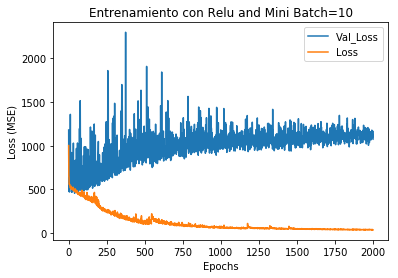

In [83]:
fig, im = plt.subplots()
im.plot(history.history['val_loss'])
im.plot(history.history['loss'])
im.set(xlabel='Epochs', ylabel='Loss (MSE)',title='Entrenamiento con Relu and Mini Batch=10')
im.legend(('Val_Loss', 'Loss' )) 

In [98]:
error_1=model.predict(X_test)

In [99]:
error_1

array([[-44.674477 ],
       [-21.300762 ],
       [ 14.53437  ],
       ...,
       [ 59.173946 ],
       [ 27.213917 ],
       [  1.0071435]], dtype=float32)

In [100]:
y_test

array([[28],
       [28],
       [28],
       ...,
       [10],
       [10],
       [10]], dtype=uint8)